### Shallow neural network

In [57]:
import numpy as np
import matplotlib.pyplot as plt

### 구현

#####  sigmoid 함수

In [46]:
def sigmoid(x):
    return 1 / 1+ np.exp(-x)

#####  softmax 함수

In [47]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

##### 네트워크 구조 정의

In [48]:
class ShallowNN:
    def __init__(self, num_input, num_hidden, num_output):
        self.W_h = np.zeros((num_input, num_hidden), dtype=np.float32)
        self.b_h = np.zeros((num_hidden,), dtype=np.float32)
        self.W_o = np.zeros((num_hidden,num_output), dtype=np.float32)
        self.b_o = np.zeros((num_output,), dtype=np.float32)
        
    def __call__(self, x):
        h = sigmoid(np.matmul(np.transpose(self.W_h), x) + self.b_h)
        return softmax(np.matmul(np.transpose(self.W_o), h) + self.b_o)

#####  데이터 셋 로드

In [49]:
dataset = np.load('dataset/shallow_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

##### 모델 만들기

In [50]:
model = ShallowNN(2, 128, 10) 

#####  사전에 학습된 파라미터 불러오기

In [68]:
weights = np.load('dataset/shallow_parameters.npz')
model.W_h = np.transpose(weights['W_h'])
model.b_h = weights['b_h']
model.W_o = np.transpose(weights['W_o'])
model.b_o = weights['b_o']

######  np.stack(array, axis=0, out=None)
Join a sequence of arrays along a new axis.

arrays = sequence of array_like
    Each array must have the same shape
axis = int, optional
    The axis in the result array along which the input arrays are stacked.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be currect, matching that of what stack would have returned if no out argument were specified.
    
``` python
    >>> arrays = [np.random.randn(3,4) for _ in range(10)]
    >>> np.stack(arrays, axis=0).shape

```


In [52]:
array = np.array([[1,2,3],[4,5,6],[7,8,9]])
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [53]:
np.stack(array, axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [54]:
np.stack(array, axis=1)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

#####  모델 결과 프린트

In [69]:
outputs = list()
for pt, label in zip(inputs, labels):
    output = model(pt)
    outputs.append(np.argmax(output))
    print(np.argmax(output), label)
outputs = np.stack(outputs, axis=0)

<ipython-input-47-602f73c35a62>:2: RuntimeWarning: overflow encountered in exp
  e_x = np.exp(x)
<ipython-input-47-602f73c35a62>:3: RuntimeWarning: invalid value encountered in true_divide
  return e_x / np.sum(e_x)


2 0
7 0
2 0
3 0
2 0
7 0
2 0
7 0
2 0
7 0
2 0
7 0
7 0
2 0
7 0
2 0
4 0
2 0
7 0
7 0
7 0
7 0
7 0
2 0
7 0
2 0
7 0
7 0
3 0
7 0
7 0
7 0
2 0
2 0
2 0
3 0
2 0
2 0
2 0
7 0
2 0
7 0
2 0
2 0
2 0
7 0
2 0
2 0
2 0
2 0
3 0
2 0
2 0
2 0
7 0
2 0
7 0
2 0
7 0
2 0
7 0
2 0
2 0
4 0
2 0
2 0
7 0
2 0
7 0
7 0
3 0
7 0
2 0
7 0
2 0
2 0
3 0
7 0
3 0
2 0
7 0
7 0
2 0
2 0
2 0
4 0
2 0
2 0
2 0
7 0
2 0
2 0
7 0
2 0
2 0
7 0
7 0
7 0
3 0
7 0
3 1
2 1
2 1
2 1
2 1
3 1
2 1
2 1
2 1
2 1
3 1
3 1
2 1
3 1
3 1
2 1
3 1
3 1
3 1
3 1
3 1
2 1
2 1
2 1
2 1
3 1
2 1
3 1
2 1
2 1
3 1
7 1
3 1
2 1
3 1
2 1
3 1
2 1
2 1
3 1
3 1
2 1
7 1
3 1
3 1
3 1
3 1
3 1
2 1
2 1
3 1
3 1
2 1
3 1
2 1
7 1
2 1
3 1
3 1
5 1
2 1
2 1
3 1
3 1
2 1
2 1
3 1
3 1
2 1
2 1
2 1
2 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
3 1
2 1
2 1
5 1
3 1
3 1
2 1
3 1
3 1
3 1
3 1
2 1
3 1
3 1
2 1
3 1
3 1
2 1
2 1
2 1
7 2
2 2
7 2
1 2
4 2
3 2
4 2
6 2
7 2
4 2
7 2
7 2
6 2
4 2
7 2
5 2
4 2
3 2
7 2
2 2
6 2
4 2
6 2
4 2
2 2
4 2
1 2
1 2
4 2
7 2
2 2
7 2
4 2
4 2
3 2
7 2
4 2
4 2
4 2
3 2
4 2
4 2
7 2
7 2
4 2
1 2
3 2
2 2
4 2
4 2


#####  그래프 그리기

Text(0.5, 1.0, 'true_label')

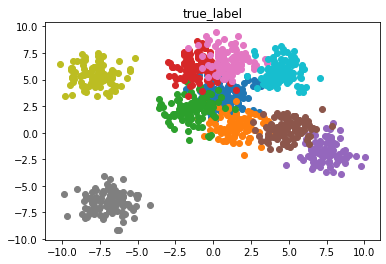

In [63]:
plt.figure()
for idx in range(10):
    mask = (labels == idx)
    plt.scatter(inputs[mask,0], inputs[mask,1])
plt.title('true_label')

Text(0.5, 1.0, 'output_label')

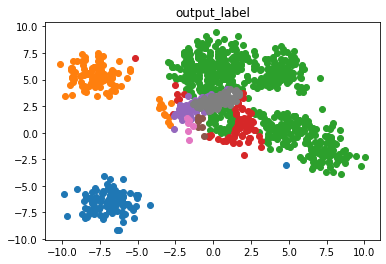

In [65]:
plt.figure()
for idx in range(10):
    mask = (outputs == idx)
    plt.scatter(inputs[mask,0], inputs[mask,1])
plt.title('output_label')